In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import husl

In [2]:
sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})

colors = [(257, 71, 27)]
palette = sns.color_palette([husl.husl_to_hex(*x) for x in colors])

In [3]:
folder = '/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/clustering/'

In [4]:
bic = pd.read_csv(folder + 'complete_bic.csv', index_col=0)

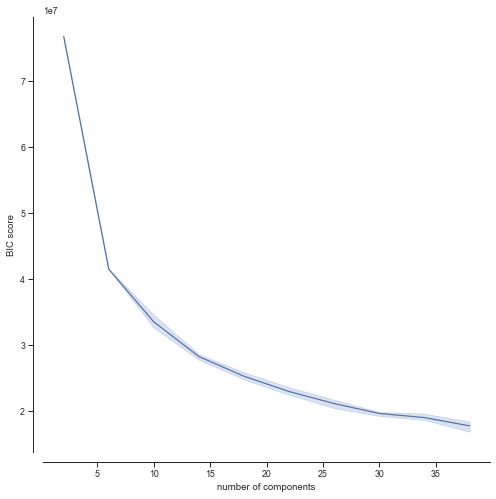

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(ax=ax, x="n", y="bic",
             data=bic, palette=palette)
sns.despine(offset=10)
plt.xlabel('number of components')
plt.ylabel('BIC score')
plt.savefig('figures/clusters/AMS_bic.pdf', bbox_inches='tight')

In [7]:
gradients = []

group = bic.groupby('n').mean()
group['gradient'] = np.gradient(group.bic)

In [11]:
group['gradient']

n
2.0    -3.534697e+07
6.0    -2.167438e+07
10.0   -6.629987e+06
14.0   -4.123890e+06
18.0   -2.653924e+06
22.0   -2.073284e+06
26.0   -1.665534e+06
30.0   -1.063862e+06
34.0   -9.388299e+05
38.0   -1.252687e+06
Name: gradient, dtype: float64

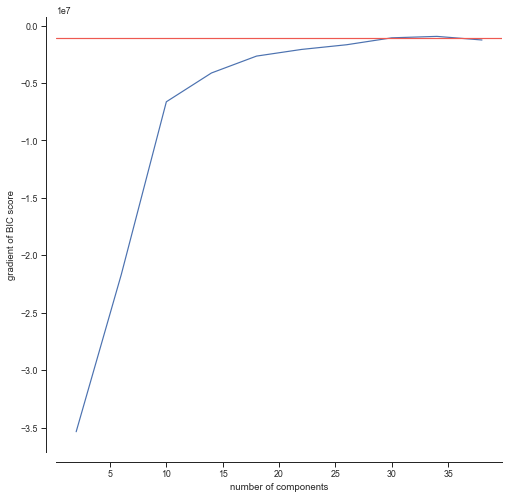

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(ax=ax, x='n', y='gradient', data=group.reset_index())
sns.despine(offset=10)
plt.xlabel('number of components')
plt.ylabel('gradient of BIC score')
plt.axhline(-1.063862e+06, color=husl.husl_to_hex(14, 79, 58))
plt.savefig('figures/clusters/AMS_bic_gradient.pdf', bbox_inches='tight')

In [17]:
combined = pd.read_csv('/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/clustering/AMS+PRG_sampled05_BIC.csv', index_col=0)

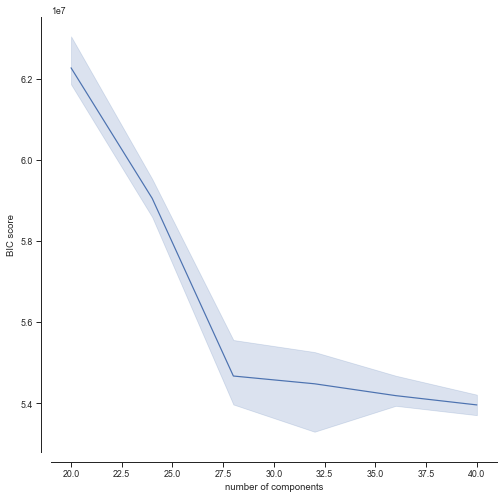

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(ax=ax, x="n", y="bic",
             data=combined, palette=palette)
sns.despine(offset=10)
plt.xlabel('number of components')
plt.ylabel('BIC score')
plt.savefig('/Users/martin/Dropbox/Academia/PhD/00_Core/08_Taxonomy/AMS+PRG/figures/combined/AMSPRG_bic.pdf', bbox_inches='tight')